head_tail_group_one 0.8133426862


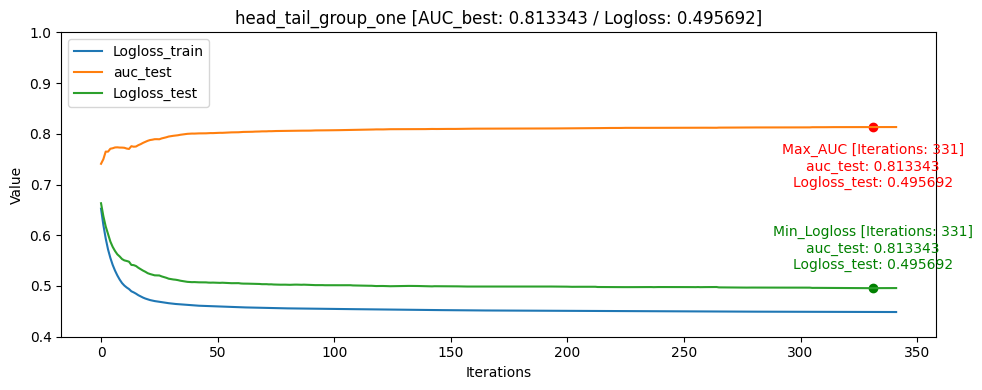

all 0.8329739135


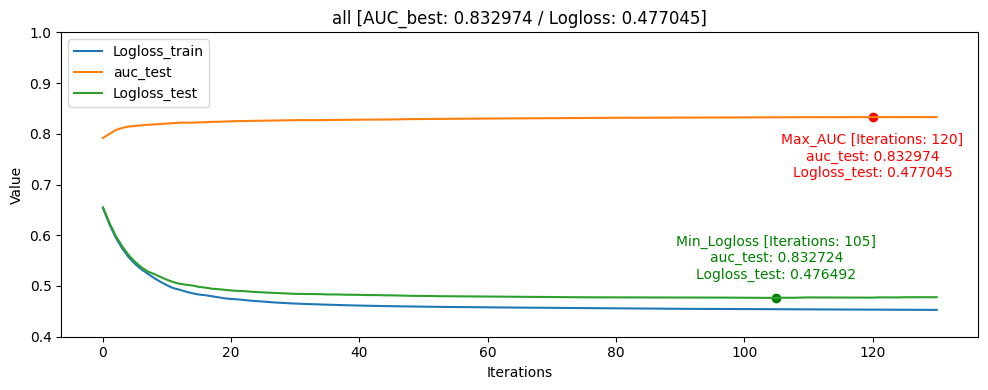

tail 0.8323255973


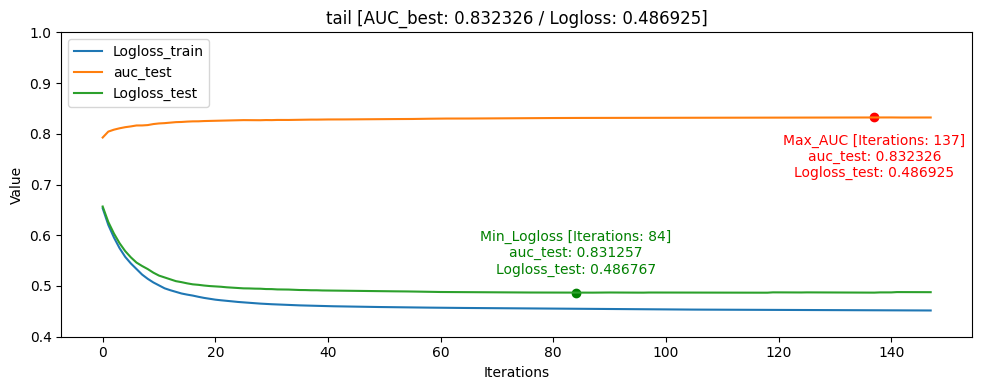

head 0.8261284008


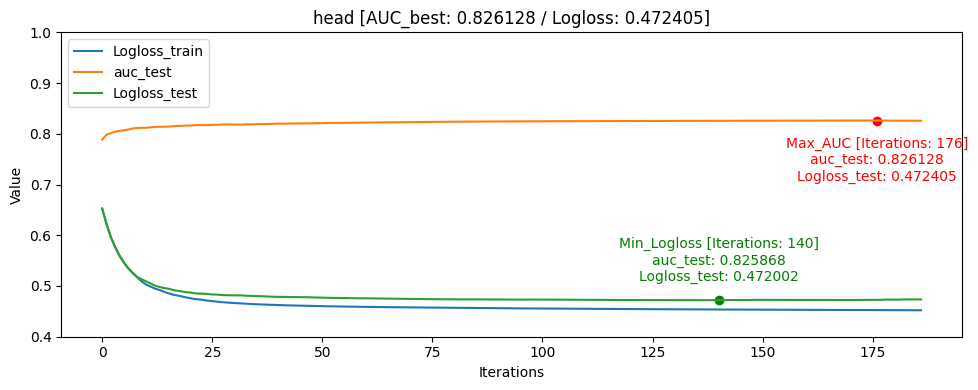

tail_one 0.816564602


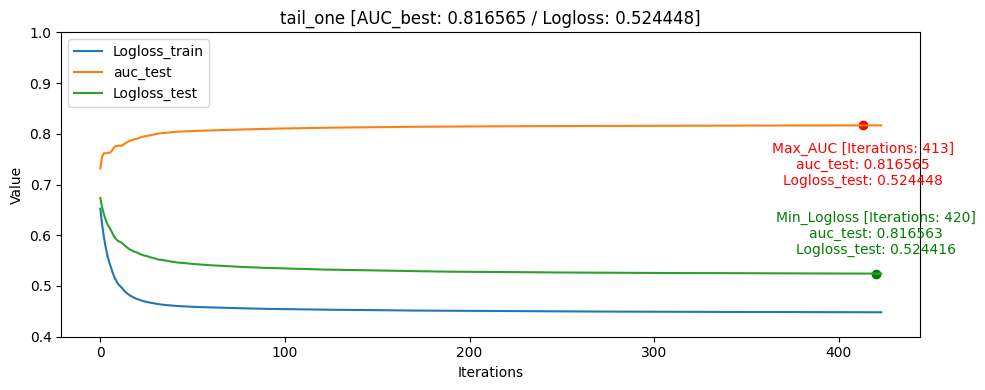

head_one 0.8581626854


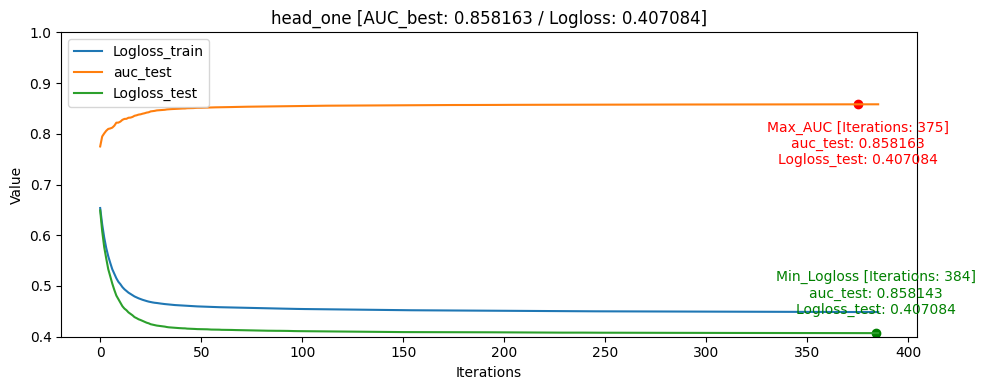

head_tail_one 0.85170357


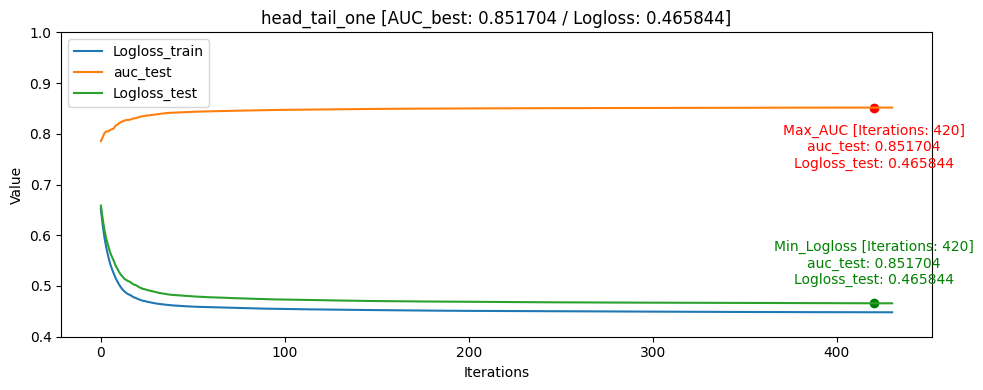

In [106]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def show_plot(title: str, dataframe: pd.DataFrame):
    # 그래프 크기 설정
    plt.figure(figsize=(10, 4))
    # 그래프 그리기
    plt.plot(df.index, df['Logloss_train'], label='Logloss_train')
    plt.plot(df.index, df['auc_test'], label='auc_test')
    plt.plot(df.index, df['Logloss_test'], label='Logloss_test')
    # y축 범위 설정
    plt.ylim(0.4, 1)
    # 최대값과 최소값 지점 찾기
    max_idx = np.argmax(df['auc_test'])
    min_idx = np.argmin(df['Logloss_test'])
    # 최대값과 최소값 표시
    plt.scatter(max_idx, df.loc[max_idx, 'auc_test'], color='red')
    plt.scatter(min_idx, df.loc[min_idx, 'Logloss_test'], color='green')
    # 최대값과 최소값의 수치와 인덱스 표시
    plt.text(max_idx, df.loc[max_idx, 'auc_test'], f"\nMax_AUC [Iterations: {max_idx}]\nauc_test: {df.loc[max_idx, 'auc_test']:.6f}\nLogloss_test: {df.loc[max_idx, 'Logloss_test']:.6f}",
            ha='center', va='top', color='red')
    plt.text(min_idx, df.loc[min_idx, 'Logloss_test'], f"Min_Logloss [Iterations: {min_idx}]\nauc_test: {df.loc[min_idx, 'auc_test']:.6f}\nLogloss_test: {df.loc[min_idx, 'Logloss_test']:.6f}\n",
            ha='center', va='bottom', color='green')
    # 그래프 제목 설정
    plt.title(f"{title} [AUC_best: {df.loc[max_idx, 'auc_test']:.6f} / Logloss: {df.loc[max_idx, 'Logloss_test']:.6f}]")
    # 그래프 레이블 설정
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    # 범례 표시
    plt.legend(loc='upper left')
    # 그래프 출력
    plt.tight_layout()
    plt.show()

# ---------- code ---------- #
folder_path = '../ML_models/log/catboost_classifier/'  # 폴더 경로
# 폴더 내의 파일 목록 가져오기
file_list = os.listdir(folder_path)

result_dict = dict()
for file_name in file_list:
    path = folder_path+file_name+'/catboost_training.json'
    # JSON 파일 열기
    with open(path, 'r') as f:
        json_data = json.load(f)
        result_dict[file_name] = json_data['iterations']

for key in result_dict.keys():
    df = pd.DataFrame(result_dict[key])
    df['Logloss_train'] = df['learn'].apply(lambda x: x[0])
    df['auc_test'] = df['test'].apply(lambda x: x[0])
    df['Logloss_test'] = df['test'].apply(lambda x: x[1])
    print(key, max(df['auc_test']))
    show_plot(key, df)